# **Data Reduction**

In a previous step in this topic we mentioned the fact that the volume of data available to analysts has exploded over the last 20 years. This now presents new problems with regard to what methods we use, which features we use and do we need to select all the data points for our analysis, in  order to get insightful results. Another question that arises is it necessary to collect all this data as in many cases there will be a substanial amount of missing data. We have addressed techniques that can be used with missing data. Thankfully, there are a number of techniques which can be used to reduce the size of our datasets with regard to the number of features and the volume of data, without losing to much information. In fact you can sometimes imporve the models predictive performance and will definitely reduce the computational time required.

</br>


**What is Dimensional Reduction**

As data generation and collection keeps increasing,visualizing it and drawing inferences becomes more and more challenging. Many of us look at our data from the prespective of 2 or 3 dimensional charts. When you have substanially more features, how can you extract insight from these charts. In fact we end up being quite confused, as one chart seems to show something but another doesn't.
Also if we have peta bytes of data, do we need to use all of it?
The answer to these questions is data reduction through a number of techniques :

1. Aggregation (already covered) and Discretization (already covered specially) and Binarization
2. Sampling (row reduction)
3. Dimensionality Reduction/Feature subset selection
4. Feature creation/Attribute Transformation (Feature Engineering MOOC 4)


We have covered the use of aggregation using binning techniques or histograms, so we are now going to look at row reduction using sampling techniques and dimensionality reduction. In other words we reduce either the number of rows we need to do our analysis or the number of features we need for our analysis.
We will dicuss feature creation in MOOC 4

Lets have a look at row reduction or sampling first .

</br>

#**Sampling**
Sampling has been the traditional approach when collecting data for social surveys. We are all familiar with samples being used to determine elections or when market research companies are assessing peoples product preferences. If the sample is picked correctly we get a sub-dataset that reflects the original dataset and thus we can make projections about the original dataset. There are many techniques that can be used to sample your data and they inlcude the following:

1. **Simple random sampling**
> * Its easy to implement as each row/individual in your dataset as equal chance f being selected.
> * It does not guarantee that every group (if they exist) in your data will be represented.

2. **Systematic sampling**
>* Easier to use than Simple random sampling as selection is based on a regular interval(every 10th row/individual)
>* may cuase bias if there are regular fluctuations in your data. Not really appropriate for time series data.

3. **Stratified sampling**
> * The data is strafied by a number of subgroups/catgories and is good way of truely represneting the data and reduces bias
> * however it requires a detailed knowledge of the data structure.

4. **Clustered sampling**
>* Similar to stratified sampling
>* Bias if the cluster do not represent the characteristics of the data

There are many non-probabilistic techniques ranging from Convience sampling, Quota Sampling, Judgement Sampling and Snowball sampling, but they are predominantly used in social science surveying and would not be particularly relevant to data analytics projects. If you want to explore this more try this [link](http://www.csun.edu/~hbsoc126/soc4/chapter_8_outline.pdf)


When chosing a sampling technique try and pick one that reflects the structure of your data. with Simple Random Sampling random sampling for example:
1. There is an equal probability of selecting any particular item
2. Sampling without replacement
3. As each item is selected, it is removed from the population
4. Sampling with replacement
5. Objects are not removed from the population as they are
selected for the sample.
6. In sampling with replacement, the same object can be picked up more
than once

The choice of technique should be carefully thought out.


#**Dimensionality Reduction**
So lets think about the second problem (feature/dimensionality reduction). In the past few topics we discussed two very simple concepts known as correlation and mult-collinearity. Both of these have measurments such as pearson's correlation coefficent ($\rho$) and VIF which allow us to measure the linear relationship between variables.In large datasets you will probably find a considerable amount of variables that are correlated in some way. For example Blood pressue and BMI are regularly correlated in health studies. For many data analysts the first thing we all do is review the correlation matrix. If there are variables in the matrix with extremely high correlations >0.9 then this would lead us to believe we will gain nothing by having both variables in our models.

**Just a side note here is that we will lose model performance if we have highly correlated variables in our models.**

The next thing we might do, would be to analysis the VIF results. So if we had VIF results for specific variables >10, then we might consider dropping this variable.The problem with these apporches is we don't know which variable to select.

There are a large number of dimensionality reduction techniques, and they all have their positives and negatives. Here is a sample given by [The NEWSTACK](https://thenewstack.io/3-new-techniques-for-data-dimensionality-reduction-in-machine-learning/):
1. Ratio of missing values
2. Low variance in the column values
3. High correlation between two columns
4. Principal component analysis (PCA)
5. Candidates and split columns in a random forest
6. Backward feature elimination
7. Forward feature construction
8. Linear discriminant analysis (LDA)
9. Neural autoencoder
10. t-distributed stochastic neighbor embedding (t-SNE)
11. Multiple Correspondence Analysis (MCA).

We will discuss a large number of these in the Feature Engineering section in MOOC 4 but to get you started we will outline the following 3 techniques in this and the following 2 steps of this Topic:
> Principal Component Analysis (Still regularly used)
> Ridge Regression (Used as a reference for Lasso Regression)
> Lasso Regression (helps select a subset of covariates)
</br>

**[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)**

Principal component analysis (PCA) is a dimensionality reduction technique that is used regularly in Data Analytics. It examines the linear relationship between variables and attempts to create new variables that are orthogonal (not correlated). By selecting a small subset of the orthogonal variables we can maintain 90%+ of the information of the orginal variables, thus reducing the dimensionality of the proposed dataset. Each new orthogonal variable is known as a component and they are generally ordered with regard to the amount of variation they explain. So for example the first component will explain the most variation within the dataset, the second will explain the second most amount of variation and so on. The big advantage with PCA is that it reduces the dimensionality of the problem substanially and can in fact create new latent features that will allow us to group variables together **without** having to make a decision as to which of the original variables we should pick. The link above to Wikipedia will give you more detail on the background to PCA.

Now I want to point a very important issue that all students seem to forget when they use PCA and that is it should only be used on continous variables. Most students I have had in the past try on nominal variables and it frankly makes no sense to do this. You can use a method called MCA to help you address this problem.









Lets do an example of PCA in Python. I have copied a lot of the code from [datascience](https://datascienceplus.com/principal-component-analysis-pca-with-python/) but I have swaped the datasets from the Breast Cancer data to the IRIS data.
So import the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

We will use the Iris data from sklearn. In it we see this has 'data' that contains the features. we will convert this into a dataframe.

In [2]:
#from sklearn.datasets import load_breast_cancer
#data = load_breast_cancer()
from sklearn.datasets import load_iris
data = load_iris()

print(data.keys())
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Generally, we are going to have to standardise our data when using PCA, however, in the IRIS example it is probably not necessary. Also this example is for illustrative purposes as we only have 4 features.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [4]:
scaled_data = scaler.transform(df)
print(type(scaled_data))

<class 'numpy.ndarray'>


We have now transformed the data an are now going to use the PCA component from sklearn to create 2 new orthogonal components.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print('scaled data shape ',scaled_data.shape)
print('pca shape ',x_pca.shape)

scaled data shape  (150, 4)
pca shape  (150, 2)


You can see we have reduced the dataset from 4 to parameters.

<ipython-input-6-bcb05aad803e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')


Text(0, 0.5, 'Second Principal Component')

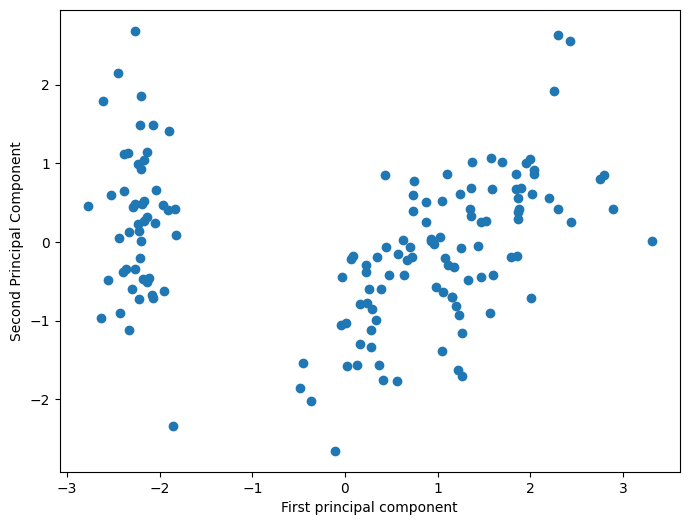

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Now we have been able to view a 4 dimensional problem in 2 without any real loss of information.
The next 2 code snipet show us the contribution of each feature in the new components and the % of variation explained by each component. We can see that component 0 explains 72.96% and component 1 explains 22.85%, totalling to 95.81%. We can see for example petal length has a very low contribution to component 1 and is far more important in component 0. Have a look for yourself.

In [7]:
print("explained variance %",pca.explained_variance_ratio_*100)
print(pca.components_)

explained variance % [72.96244541 22.85076179]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


<Axes: >

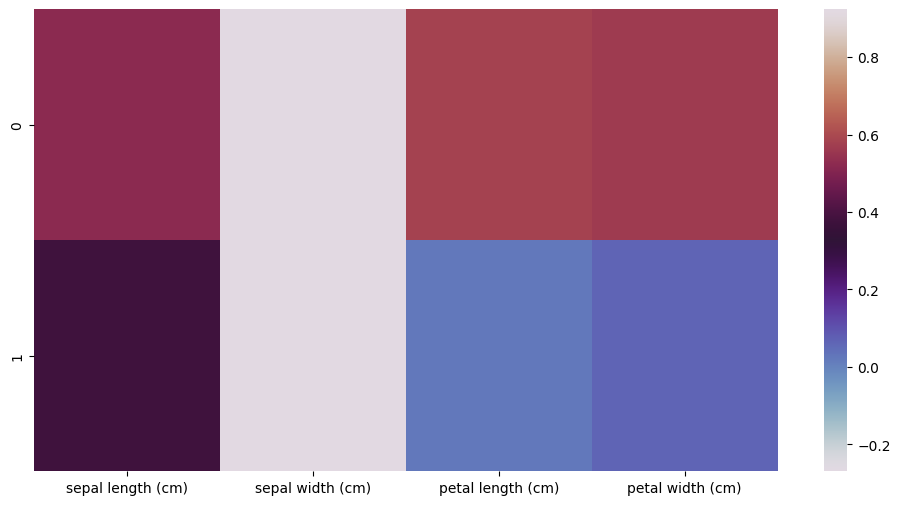

In [10]:
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')